In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
# reading the dataset
data=pd.read_csv('Datasets/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
#dropping car name as it makes no significance for this sinario
data=data.drop('car name',axis=1 )
# replacing origin column with  1 : Amerrica 2: Europe 3: Japaniese as they are described in the data file
data['origin']=data['origin'].replace({1: 'American',2: 'Europian', 3:'Japanese'})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,American
1,15.0,8,350.0,165,3693,11.5,70,American
2,18.0,8,318.0,150,3436,11.0,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,17.0,8,302.0,140,3449,10.5,70,American


In [10]:
# checking the datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [37]:
# despite of having numbers horsepower is having an object datatype. This means there might be some non-digit values present
hpIsDigit=pd.DataFrame(data.horsepower.str.isdigit()) # if the string is made of digits store True else False
data[hpIsDigit['horsepower']==False] # printing data where there is non-digit horse power

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,American
126,21.0,6,200.0,?,2875,17.0,74,American
330,40.9,4,85.0,?,1835,17.3,80,Europian
336,23.6,4,140.0,?,2905,14.3,80,American
354,34.5,4,100.0,?,2320,15.8,81,Europian
374,23.0,4,151.0,?,3035,20.5,82,American


In [39]:
data=data.replace('?',np.nan)
data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,American
126,21.0,6,200.0,NaN,2875,17.0,74,American
330,40.9,4,85.0,NaN,1835,17.3,80,Europian
336,23.6,4,140.0,NaN,2905,14.3,80,American
354,34.5,4,100.0,NaN,2320,15.8,81,Europian
374,23.0,4,151.0,NaN,3035,20.5,82,American


In [50]:
# replacing the missing values of horsepower column with its meadian
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

In [53]:
data['horsepower']=data['horsepower'].astype('float32')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float32
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float32(1), float64(3), int64(3), object(1)
memory usage: 23.4+ KB


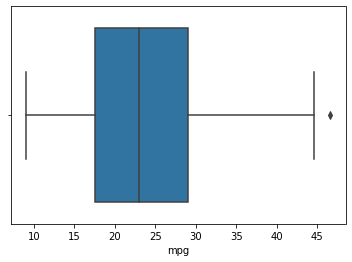

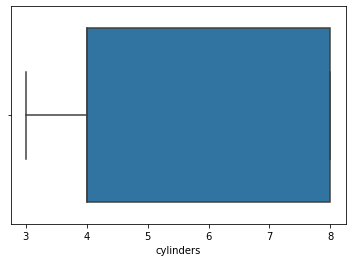

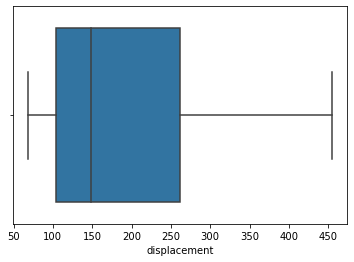

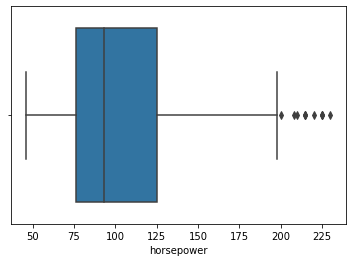

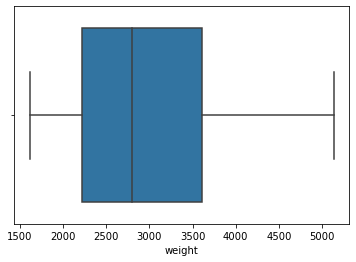

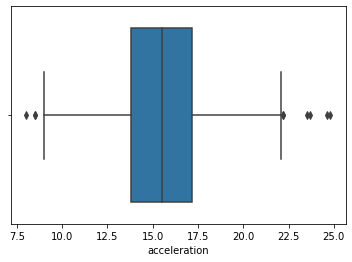

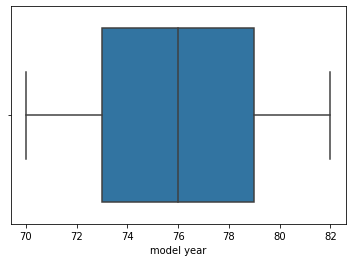

In [79]:
# checking for outliers in data. we csan visualise it in boxplot
cdata=data.drop('origin',axis=1)
for i in cdata:
    fig=plt.figure()
    sns.boxplot(cdata[i])



In [18]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000
